In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv
df = pd.read_csv('uajy.csv')

In [3]:
df['content']

0       mamak emang udah nggak ada, mudah mudahan mama...
1       Kantor Humas, Sekretariat, dan Protokol (KHSP)...
2       Kedatangan temans se almamater @uajy @hmpskom ...
3       ❗❗PROMO FTI ART UAJY 2019❗❗\n📷 NATIONAL PHOTOG...
4       Sedang berlangsung Dialog Aktual PRO 1 RRI den...
                              ...                        
2037    “Tujuan pendidikan itu untuk mempertajam kecer...
2038    “Tujuan pendidikan itu untuk mempertajam kecer...
2039    [UJIAN AKHIR SEMESTER]\n\nHalo guys 👋👋 \n\nTid...
2040    [KALENDER DESEMBER]\n\nHai guys 😁 \n\nTak tera...
2041    [ KALENDER DESEMBER ]\n\nTak terasa sudah samp...
Name: content, Length: 2042, dtype: object

# Rename Raw Data

In [4]:
df['content'].to_csv('uajy-raw.csv')

### Text Preprocessing

In [5]:
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from nltk.corpus import stopwords

### Regex Cleansing

In [6]:
def cleantext(tweet):
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = re.sub(r'^www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    return tweet

In [7]:
dfc = df['content'].apply(cleantext)

In [8]:
dfc

0       mamak emang udah nggak ada mudah mudahan mamak...
1       kantor humas sekretariat dan protokol khsp uaj...
2       kedatangan temans se almamater ke redaksi bisn...
3       promo fti art uajy national photography compet...
4       sedang berlangsung dialog aktual pro rri denga...
                              ...                        
2037    tujuan pendidikan itu untuk mempertajam kecerd...
2038    tujuan pendidikan itu untuk mempertajam kecerd...
2039    ujian akhir semester halo guys tidak terasa be...
2040    kalender desember hai guys tak terasa kita sud...
2041    kalender desember tak terasa sudah sampai di u...
Name: content, Length: 2042, dtype: object

## Stemming

In [9]:
dfcs = dfc.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [10]:
dfcs

0       mamak emang udah nggak ada mudah mudah mamak u...
1       kantor humas sekretariat dan protokol khsp uaj...
2       datang temans se almamater ke redaksi bisnis i...
3       promo fti art uajy national photography compet...
4       sedang langsung dialog aktual pro rri dengan t...
                              ...                        
2037    tuju didik itu untuk tajam cerdas kukuh mau se...
2038    tuju didik itu untuk tajam cerdas kukuh mau se...
2039    uji akhir semester halo guys tidak asa besok u...
2040    kalender desember hai guys tak asa kita sudah ...
2041    kalender desember tak asa sudah sampai di ujun...
Name: content, Length: 2042, dtype: object

## Stopwords

In [11]:
dfcst = dfcs.apply(lambda x: ' '.join([word for word 
                                   in x.split() if word not in stopwords.words('indonesian')]))

In [12]:
dfcst

0       mamak emang udah nggak mudah mudah mamak udah ...
1       kantor humas sekretariat protokol khsp uajy se...
2       temans almamater redaksi bisnis indonesia moga...
3       promo fti art uajy national photography compet...
4       langsung dialog aktual pro rri topik bedah vis...
                              ...                        
2037    tuju didik tajam cerdas kukuh halus asa tan ma...
2038    tuju didik tajam cerdas kukuh halus asa tan ma...
2039    uji semester halo guys asa besok uas yaa lupa ...
2040    kalender desember hai guys asa masuk desember ...
2041    kalender desember asa ujung semester gasal jag...
Name: content, Length: 2042, dtype: object

# Rename Cleaned Data

In [13]:
dfcst.to_csv('uajy-cleaned.csv')

### TF-IDF Vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = dfcst
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.6, 
                             stop_words=stopwords.words('indonesian'))
X = vectorizer.fit_transform(corpus).toarray()

D:\Atmajaya\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [15]:
tfidf = pd.DataFrame(X, columns=vectorizer.get_feature_names()).sum().sort_values(ascending=False)

# Rename TF-IDF

In [16]:
tfidf.to_csv('tfidf-uajy.csv')

### POS-Tagging

In [17]:
from nltk.tag import CRFTagger

In [18]:
def preprocessing(text):
    case_folded = text.lower()
    tokenized = nltk.word_tokenize(case_folded)
    return tokenized

In [19]:
dfcst_preprocessed = dfcst.apply(preprocessing)

In [20]:
dfcst_preprocessed

0       [mamak, emang, udah, nggak, mudah, mudah, mama...
1       [kantor, humas, sekretariat, protokol, khsp, u...
2       [temans, almamater, redaksi, bisnis, indonesia...
3       [promo, fti, art, uajy, national, photography,...
4       [langsung, dialog, aktual, pro, rri, topik, be...
                              ...                        
2037    [tuju, didik, tajam, cerdas, kukuh, halus, asa...
2038    [tuju, didik, tajam, cerdas, kukuh, halus, asa...
2039    [uji, semester, halo, guys, asa, besok, uas, y...
2040    [kalender, desember, hai, guys, asa, masuk, de...
2041    [kalender, desember, asa, ujung, semester, gas...
Name: content, Length: 2042, dtype: object

In [21]:
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

In [22]:
tag = ct.tag_sents(dfcst_preprocessed)

In [23]:
tag

[[('mamak', 'NN'),
  ('emang', 'NN'),
  ('udah', 'JJ'),
  ('nggak', 'RB'),
  ('mudah', 'JJ'),
  ('mudah', 'JJ'),
  ('mamak', 'NN'),
  ('udah', 'MD'),
  ('tenang', 'VB'),
  ('anak', 'NN'),
  ('uajy', 'FW'),
  ('makan', 'VB'),
  ('warung', 'NN'),
  ('makan', 'VB'),
  ('nasi', 'NN'),
  ('gongso', 'NN'),
  ('bu', 'NN'),
  ('gendut', 'NN'),
  ('jalan', 'NN'),
  ('tambakbayan', 'NN')],
 [('kantor', 'NN'),
  ('humas', 'NN'),
  ('sekretariat', 'NN'),
  ('protokol', 'FW'),
  ('khsp', 'FW'),
  ('uajy', 'FW'),
  ('semangat', 'NN'),
  ('ajak', 'NN'),
  ('mahasiswa', 'NN'),
  ('uajy', 'FW'),
  ('lomba', 'FW'),
  ('hias', 'FW'),
  ('lampion', 'FW'),
  ('yg', 'FW'),
  ('tantang', 'NN'),
  ('tarik', 'NN')],
 [('temans', 'NN'),
  ('almamater', 'NN'),
  ('redaksi', 'NN'),
  ('bisnis', 'NN'),
  ('indonesia', 'NN'),
  ('moga', 'NN'),
  ('dampak', 'NN'),
  ('lekas', 'NN'),
  ('lulus', 'JJ')],
 [('promo', 'NN'),
  ('fti', 'NN'),
  ('art', 'FW'),
  ('uajy', 'FW'),
  ('national', 'FW'),
  ('photography', 'FW'

In [24]:
df_tagger = pd.DataFrame([j for i in tag for j in i])

In [25]:
df_tagger = df_tagger.rename(columns={0:'Word',1:'POS'})

In [26]:
df_tagger

,Word,POS
0,mamak,NN
1,emang,NN
2,udah,JJ
3,nggak,RB
4,mudah,JJ
...,...,...
27195,uas,NN
27196,sesuai,JJ
27197,harap,VB
27198,temu,VB


# Rename POS Tagger

In [27]:
df_tagger.to_csv('uajy-tagger.csv')

### Merge Dataset

In [28]:
tfidf = pd.DataFrame(tfidf).reset_index().rename(columns={'index':'Word', 0:'Weight'})

In [29]:
weighted_tag = tfidf.merge(df_tagger).drop_duplicates(subset='Word').reset_index().drop('index',axis=1)

# Rename Weighted Tag

In [30]:
weighted_tag.to_csv('weighted_tag-uajy.csv')

In [31]:
pos_tag = pd.concat([weighted_tag[weighted_tag['POS']=='JJ'].head(50), 
          weighted_tag[weighted_tag['POS']=='NN'].head(50),
          weighted_tag[weighted_tag['POS']=='VB'].head(50)]).reset_index().drop('index',axis=1)

# Rename POS 

In [32]:
pos_tag.to_csv('pos_tag-uajy.csv')

In [62]:
pos_tag[pos_tag.Weight>10]

,Word,Weight,POS
0,udah,10.599885,JJ
1,lulus,10.015364,JJ
50,ligamahasiswa,50.386566,NN
51,putra,47.549736,NN
52,mahasiswa,36.610548,NN
53,yogyakarta,33.806807,NN
54,atmajogja,33.400324,NN
55,tanding,31.905447,NN
56,info,31.013734,NN
57,atma,30.875250,NN


### bi-gram

In [33]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),2)).value_counts()

(id, ligamahasiswa)    167
(kaskus, cjyc)         162
(cjyc, season)         161
(uajy, vs)             154
(atma, jaya)           151
                      ... 
(bhs, inggris)           1
(kantin, calsita)        1
(cabang, babarsari)      1
(archi, life)            1
(udh, masuk)             1
Length: 16131, dtype: int64

In [34]:
bigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      2)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'bigram',1:'count'})

In [35]:
bigram_df

,index,bigram
0,"(id, ligamahasiswa)",167
1,"(kaskus, cjyc)",162
2,"(cjyc, season)",161
3,"(uajy, vs)",154
4,"(atma, jaya)",151
5,"(badminton, kaskus)",144
6,"(season, id)",138
7,"(ligamahasiswa, kaskus)",137
8,"(universitas, atma)",129
9,"(jaya, yogyakarta)",128


In [36]:
# create dictionary of bigrams and their counts
d = bigram_df.set_index('index').T.to_dict('records')

In [37]:
d

[{('id', 'ligamahasiswa'): 167,
  ('kaskus', 'cjyc'): 162,
  ('cjyc', 'season'): 161,
  ('uajy', 'vs'): 154,
  ('atma', 'jaya'): 151,
  ('badminton', 'kaskus'): 144,
  ('season', 'id'): 138,
  ('ligamahasiswa', 'kaskus'): 137,
  ('universitas', 'atma'): 129,
  ('jaya', 'yogyakarta'): 128,
  ('skor', 'badminton'): 128,
  ('regu', 'putra'): 127,
  ('info', 'from'): 114,
  ('court', 'regu'): 112,
  ('uajy', 'atmajogja'): 111,
  ('kaskus', 'court'): 104,
  ('game', 'skor'): 100,
  ('ligamahasiswa', 'awalmasadepan'): 99,
  ('basketball', 'nationals'): 93,
  ('nationals', 'season'): 93}]

In [38]:
import networkx as nx

In [39]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("uajy",weight=100)

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

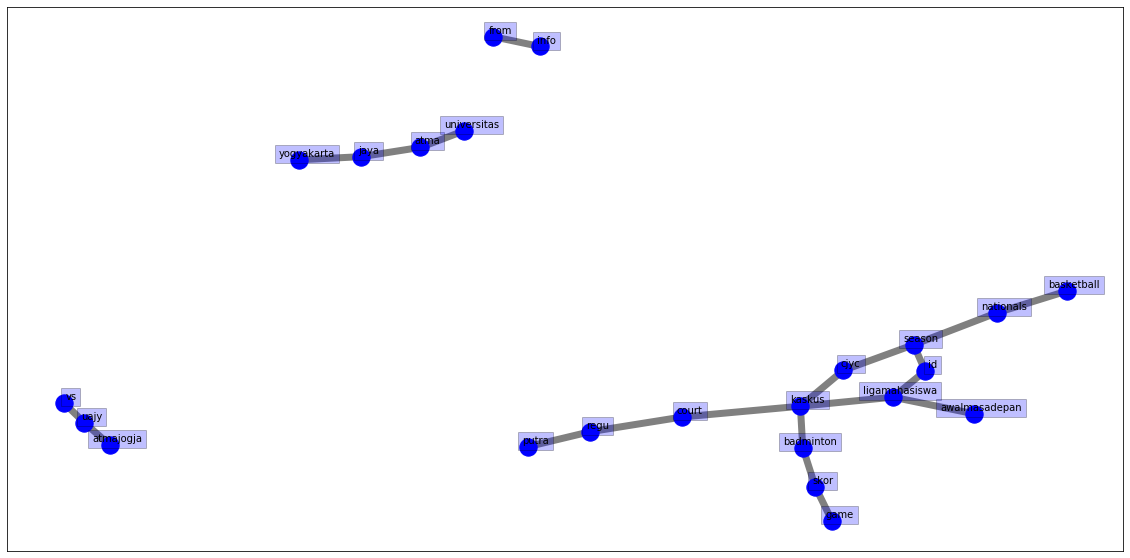

In [41]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=2)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

### tri-grams

In [42]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),3)).value_counts()

(kaskus, cjyc, season)         161
(badminton, kaskus, cjyc)      139
(cjyc, season, id)             138
(season, id, ligamahasiswa)    137
(id, ligamahasiswa, kaskus)    137
                              ... 
(terimakasih, uajy, matkul)      1
(hut, hmti, segenap)             1
(lupa, daftar, ya)               1
(uajy, unit, kelompok)           1
(sadhar, emang, kliatan)         1
Length: 19419, dtype: int64

In [43]:
trigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      3)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'trigram',1:'count'})

In [44]:
trigram_df

,index,trigram
0,"(kaskus, cjyc, season)",161
1,"(badminton, kaskus, cjyc)",139
2,"(cjyc, season, id)",138
3,"(season, id, ligamahasiswa)",137
4,"(id, ligamahasiswa, kaskus)",137
5,"(skor, badminton, kaskus)",128
6,"(atma, jaya, yogyakarta)",128
7,"(universitas, atma, jaya)",126
8,"(court, regu, putra)",112
9,"(ligamahasiswa, kaskus, court)",103


In [45]:
# create dictionary of bigrams and their counts
d1 = trigram_df.set_index('index').T.to_dict('records')

In [46]:
d1

[{('kaskus', 'cjyc', 'season'): 161,
  ('badminton', 'kaskus', 'cjyc'): 139,
  ('cjyc', 'season', 'id'): 138,
  ('season', 'id', 'ligamahasiswa'): 137,
  ('id', 'ligamahasiswa', 'kaskus'): 137,
  ('skor', 'badminton', 'kaskus'): 128,
  ('atma', 'jaya', 'yogyakarta'): 128,
  ('universitas', 'atma', 'jaya'): 126,
  ('court', 'regu', 'putra'): 112,
  ('ligamahasiswa', 'kaskus', 'court'): 103,
  ('game', 'skor', 'badminton'): 99,
  ('kaskus', 'court', 'regu'): 94,
  ('basketball', 'nationals', 'season'): 93,
  ('nationals', 'season', 'tanding'): 84,
  ('season', 'tanding', 'putra'): 84,
  ('uajyberita', 'uajy', 'atmajogja'): 69,
  ('skor', 'ligamahasiswa', 'awalmasadepan'): 65,
  ('ligamahasiswa', 'awalmasadepan', 'basketball'): 62,
  ('awalmasadepan', 'basketball', 'nationals'): 62,
  ('putra', 'uajy', 'vs'): 57}]

In [47]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d1[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("uajy",weight=100)

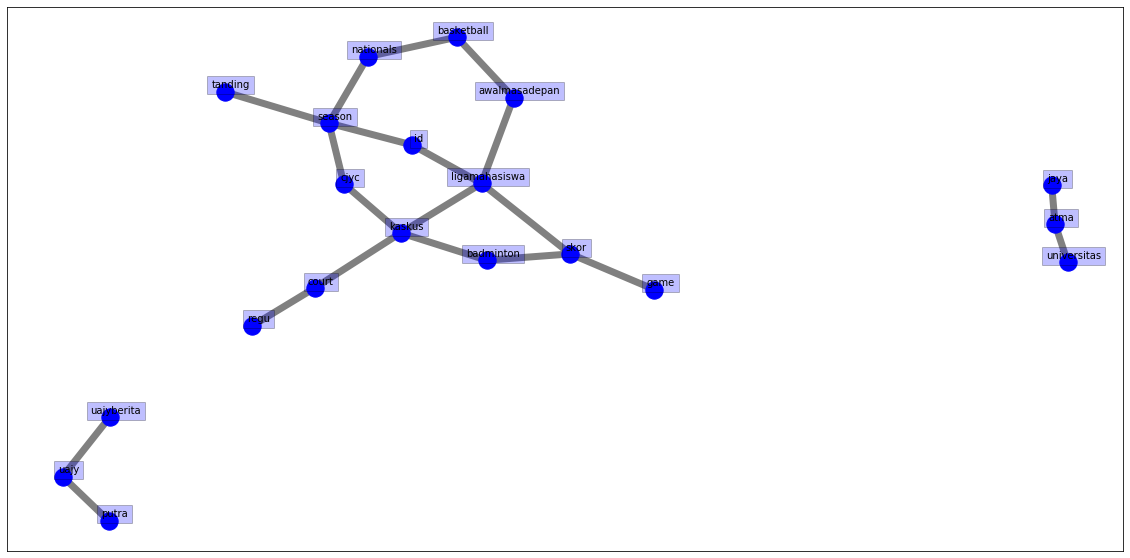

In [51]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=3)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

In [63]:
pwd

'C:\\Users\\Andika\\Desktop\\Project UNISA\\in depth analysis\\kampus kristiani jogja\\uajy'